# Задание
Пусть $X^n = \{X_1,\ldots, X_n\} \sim N(\mu, 1)$, $\theta = e^{\mu}$ и $\hat{\theta} = e^{<X^n>}$. 
Сгенерируйте выборку $X^n$ из $n = 100$ наблюдений для $\mu = 10$.
Нарисуйте гистограмму  значений $\{\hat{\theta}^*_i\}_{i=1}^B$ бутстрепных оценок. Эта гистограмма является оценкой распределения $p_{\hat{\theta}}(x)$. Сравните ее с настоящим распределением $p_{\hat{\theta}}(x)$.
Используя бутстреп, подсчитайте величину $se$ и постройте тремя способами $95\%$ доверительный интервал для $\theta$. 

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

In [2]:
mu = 10
sigma = 1
X = np.random.normal(loc=mu, scale=1, size=100)

In [3]:
n = len(X)
B = 1000
xb = np.random.choice(X, (n, B), replace=True)
xb.shape

(100, 1000)

In [4]:
# Подсчет средних для каждой бутстрепной выборки
mean_hat_boots = xb.mean(axis=0)
mean_hat_boots.shape

(1000,)

In [5]:
theta_hat_boots = np.sort([math.exp(m) for m in mean_hat_boots])
theta_hat_boots.shape

(1000,)

In [6]:
def true_density(x_list):
    ans = []
    for x in x_list:
        exp_ = math.exp(-(n * math.log(x) - n * mu)**2 / (2 * n * (sigma ** 2)))
        ans.append(exp_ * n / (x * math.sqrt(2 * math.pi * n * (sigma ** 2))))
    return ans

/Users/ekaterinakuzina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


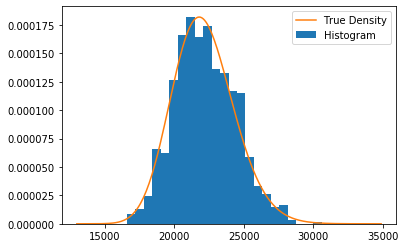

In [7]:
plt.hist(theta_hat_boots, bins='auto', normed=True, label="Histogram")

x = np.arange(13000, 35000, 100)
plt.plot(x, true_density(x), label="True Density")
plt.legend()

При многочисленной генерации выборки видно, что $\hat{\theta}$ распределена по нормальному закону. Однако иногда гистограмма сдвинута вправо или влево относительно настоящего распределения.

#### Оценка дисперсии для $\hat{\theta}$

In [8]:
theta_mean = theta_hat_boots.mean()
variance_theta_hat = ((theta_hat_boots - theta_mean)*(theta_hat_boots - theta_mean)).mean()

In [9]:
se = math.sqrt(variance_theta_hat)

In [10]:
"Бутстрепная оценка для se: {}".format(se)

'Бутстрепная оценка для se: 2182.9813371296023'

#### Нормальный интервал

In [11]:
theta_hat = math.exp(X.mean())
theta_hat

22132.804840210974

In [12]:
"Нормальный интервал: ({},{})".format(theta_hat - stats.norm.ppf(1-0.05/2) * se, theta_hat + stats.norm.ppf(1-0.05/2) * se)

'Нормальный интервал: (17854.240040513865,26411.369639908084)'

#### Центральный интервал

In [13]:
lower, upper = np.percentile(theta_hat_boots, [97.5, 2.5])

In [14]:
"Центральный интервал: {}".format([2*theta_hat - lower, 2*theta_hat - upper])

'Центральный интервал: [17509.148317200583, 25881.06775611129]'

#### Интервал на основе процентилей

In [15]:
"Интервал на основе процентилей: {}".format(np.percentile(theta_hat_boots, [2.5, 97.5]))

'Интервал на основе процентилей: [18384.54192431 26756.46136322]'